In [1]:
print("Lecture-28")

Lecture-28


## Geri Beslemeli Ağların Gelecek Kestiriminde Kullanılması ve Jena Climate Örneği

IMDB örneğinde geri beslemeli ağları yazısal metinlerden anlam çıkarmayı hedefleyen IMDB verilerinde kullandık. Halbuki bu ağlar yazısal verilerin dışında tamamen sayısal verilerin söz konusu olduğu kestirimlerde de kullanılabilmektedir. Çünkü pek çok sayısal veri tıpkı yazıyı oluşturan sözcükler gibi bir bağlama sahip olabilmektedir. Örneğin hava tahmini, borsada belli bir kağıdın gelecekteki değerinini tahmini geçmiş verilere baklılarak geri beslemeli bir ağ ile yapılmak istenebilir. Bir hava tahmini uygulamasında bir sonraki günkü hava önceki günkü havalara göre yani bir bağlam içerisinde oluşmaktadır. Benzer biçimde borsada bir kağıdın ya da bir kripto paranın fiyatı bir bağlam içerisinde değişebilmektedir.

Hava tahmini üzerinde çalışalım. Geçmiş hava durumu raporlarına bakarak bir gün sonraki hava sıcaklığını tahmin edeceğiz. Tabii şüphesiz bu tahmin daha önce yaptığımız gibi geri beslemeli olmayan ağlarla (feed forward networks) da yapılabilir. LSTM kullanacağız.

https://www.kaggle.com/datasets/stytch16/jena-climate-2009-2016

In [ ]:
import numpy as np

PREDICT_INTERVAL = 144

dataset_x = np.loadtxt('/content/jena_climate_2009_2016.csv', delimiter=',', skiprows=1, usecols=range(1, 15), dtype = np.float32)

In [ ]:
dataset_x

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]], dtype=float32)

In [ ]:
dataset_y = dataset_x[:, 1]

örneğin index değeri dataset_x matrisindeki bir satırın sıra numarasını göstermek üzere, bu satırın belirttiği zamandan 1 gün sonraki hava sıcaklığı dataset_y[index + 144] ifadesiyle elde edilecektir. 24 * 60 // 10 = 144.



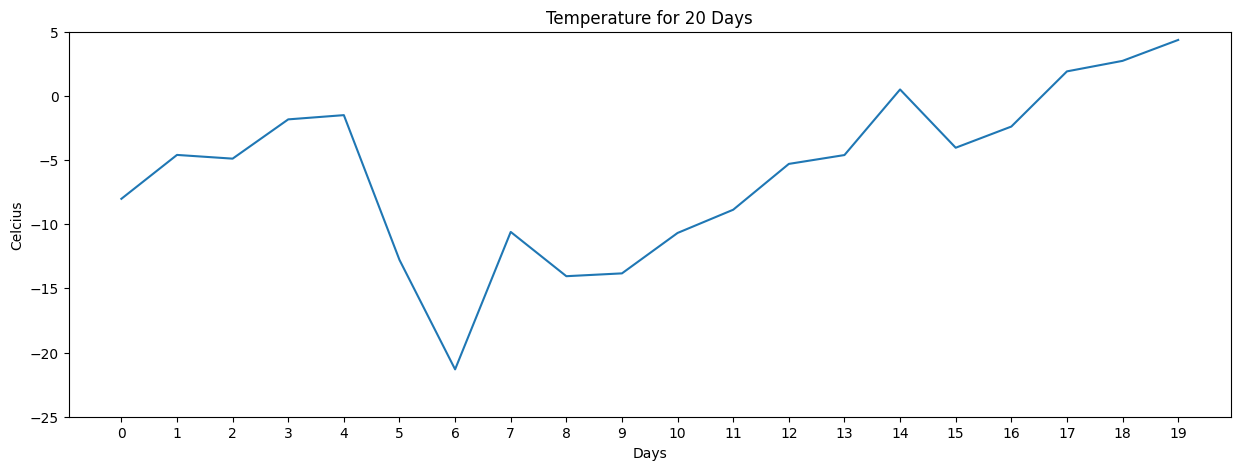

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Temperature for 20 Days')
plt.xlabel('Days')
plt.ylabel('Celcius')
plt.ylim((-25, 5))
plt.xticks(range(20))

plt.plot(range(20), dataset_y[0:PREDICT_INTERVAL * 20:PREDICT_INTERVAL])

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x[:-PREDICT_INTERVAL], dataset_y[PREDICT_INTERVAL:], test_size = 0.2)

In [ ]:
dataset_x.shape

(420551, 14)

In [ ]:
dataset_x[:-PREDICT_INTERVAL].shape

(420407, 14)

In [ ]:
dataset_y.shape

(420551,)

In [ ]:
dataset_y[PREDICT_INTERVAL:].shape

(420407,)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(training_dataset_x)
training_dataset_x = ss.transform(training_dataset_x)
test_dataset_x = ss.transform(test_dataset_x)

In [ ]:
# Modelimizi ileri beslemeli (feed forward) ağ ile deneyelim.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential(name = 'Jena-Climate')
model.add(Dense(128, input_dim=training_dataset_x.shape[1], activation='relu', name='Dense-1'))
model.add(Dropout(0.2, name='Dropout-1'))
model.add(Dense(128, activation='relu', name='Dense-2'))
model.add(Dropout(0.2, name='Dropout-2'))
model.add(Dense(1, activation='linear', name='Output'))

model.summary()

Model: "Jena-Climate"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense-1 (Dense)                      │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout-1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense-2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout-2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,561 (72.50 KB)

 Trainable params: 18,561 (72.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

from tensorflow.keras.callbacks import EarlyStopping

esc = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1)
hist = model.fit(training_dataset_x, training_dataset_y, epochs=20, batch_size=32, validation_split=0.2, callbacks=[esc])

Epoch 1/20
8409/8409 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 57.2150 - mae: 2.8773 - val_loss: 43.3579 - val_mae: 2.4894
Epoch 2/20
8409/8409 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 37.7145 - mae: 2.6082 - val_loss: 27.1229 - val_mae: 2.6080
Epoch 3/20
8409/8409 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 39.3075 - mae: 2.5986 - val_loss: 20.1421 - val_mae: 2.4885
Epoch 4/20
8409/8409 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 24.6035 - mae: 2.5655 - val_loss: 10.9533 - val_mae: 2.4435
Epoch 5/20
8409/8409 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 13.0018 - mae: 2.5416 - val_loss: 9.8876 - val_mae: 2.4394
Epoch 6/20
8409/8409 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 12.0076 - mae: 2.5297 - val_loss: 10.7775 - val_mae: 2.5629
Epoch 7/20
8409/8409 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 10.8009 - mae: 2.5218 - val_loss: 9.6988 - val_mae: 2.4243
Epoch 8/20
8409/8409 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 15.5320 - mae: 2.5154 - val_loss: 9.8250 - val_mae: 2.4417
Epoch 9/20
8409/840

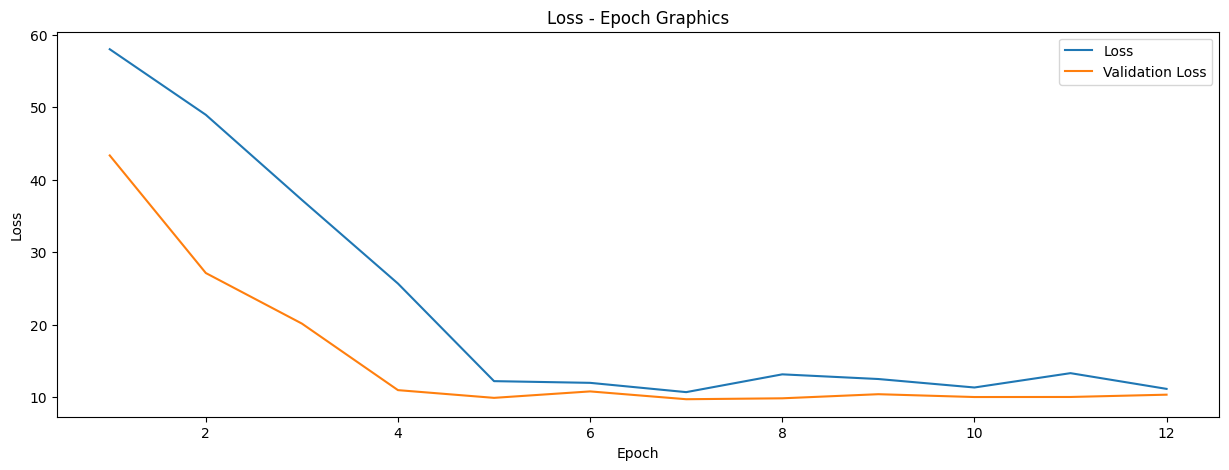

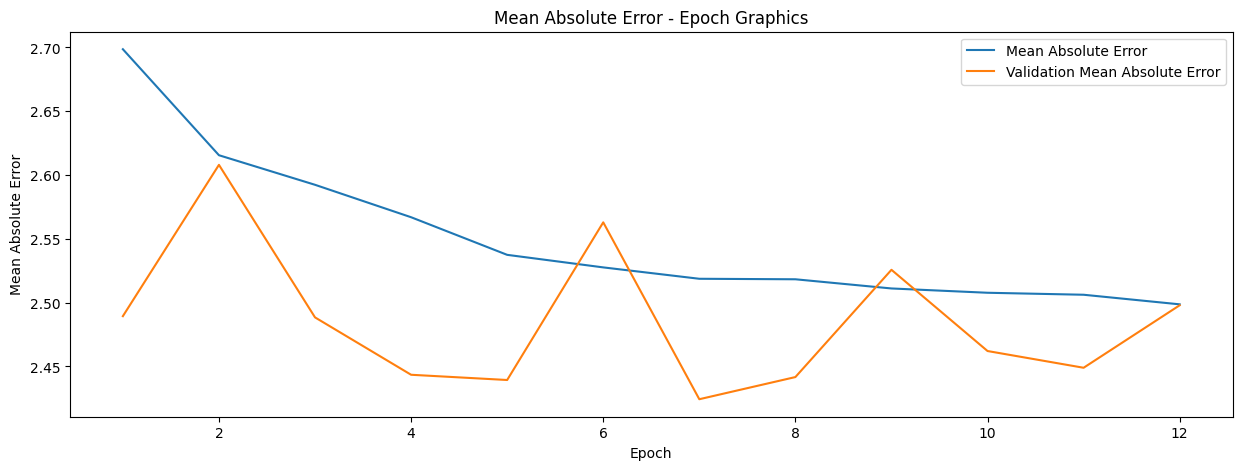

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()


figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
 print(f'{model.metrics_names[i]} --> {eval_result[i]}')

2628/2628 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.7009 - mae: 2.4186
loss --> 9.681441307067871
compile_metrics --> 2.4170544147491455


2.4170544147491455 gibi bir MAE değeri modelin tahminlerinin ortalama olarak gerçek değerlerden yaklaşık 2.41 birim uzakta olduğunu gösterir.

MAE: modelin tahminleri ile gerçek değerler arasındaki mutlak farkların ortlamasını ölçer.

Şimdi bu kestirim için LSTM katmannıa sahip geri beslemeli bir model kullanalım. Burada ağımıza belli sayıda 10'ar dakikalık bilgileri vererek belli bir zaman sonraki hava sıcaklığını tahmin etmeye çalışacağız.

In [ ]:
import numpy as np

PREDICT_INTERVAL = 144 # bizim kaç 10 dakika sonraki hava sıcaklığını tahmin etmek istediğimizi belirtiyor. Biz burada zamansal olarak ağımıza bir bellek kazandırmak istiyoruz.
LOOPBACK_INTERVAL = 144 # Ağımızın ne kadar geçmişi anımsayacağıdır. Yani biz burada belirtilen değer kadar 10 dakikalık veirleri zamansal olarak ağımıza vereceğiz.
BATCH_SIZE = 32

dataset_x = np.loadtxt('/content/jena_climate_2009_2016.csv', delimiter=',', skiprows=1, usecols=range(1, 15), dtype = np.float32)
dataset_y = dataset_x[:, 1]




bu uygulamada dikkat edilmesi gereken nokta bizim belli sayıda 10 dakikalık verileri ağa verip belli bir zaman sonraki değeri tahmin etmeye çalıştığımızdır. Bunun için training_dataset_x ve trainnig_dataset_y dizilerini oluşturmak çok zor ve verimsiz bir yöntemdir. Bu nedenle biz burada parçalı verilerle eğitim işlemi uyuglayacağız. Yani her batch işleminde bizim metodumuz çağrılacak ve biz de bir batch uzunluğu kadar bilgi oluşturup vereceğiz. Böylelikle büyük bir bellek kullanmak zorunda kalmayacağız.

In [ ]:
from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, shuffle=False, test_size = 0.1)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(training_dataset_x)
training_dataset_x = ss.transform(training_dataset_x)
test_dataset_x = ss.transform(test_dataset_x)

training_dataset_x, validation_dataset_x, training_dataset_y, validation_dataset_y = train_test_split(training_dataset_x, training_dataset_y, shuffle=False, test_size = 0.2)

parçalı verilerle eğitim için generator sınıfımızı yazalım.

In [ ]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
  def __init__(self, dataset_x, dataset_y, batch_size):
    self.dataset_x = dataset_x
    self.dataset_y = dataset_y
    self.batch_size = batch_size
    self.indices = np.arange((len(self.dataset_x) - PREDICT_INTERVAL) // self.batch_size, dtype=np.int32)

  def __len__(self):
    return (len(self.dataset_x) - PREDICT_INTERVAL) // self.batch_size

  def __getitem__(self, index):
    result_x = np.zeros((BATCH_SIZE, LOOPBACK_INTERVAL, training_dataset_x.shape[1]))
    result_y = np.zeros(BATCH_SIZE)

    for i in range(self.batch_size):
      start = self.indices[index] * self.batch_size + i
      result_x[i] = self.dataset_x[start:start + LOOPBACK_INTERVAL]
      result_y[i] = self.dataset_y[start + PREDICT_INTERVAL]

    return result_x, result_y

  def on_epoch_end(self):
    np.random.shuffle(self.indices)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, LSTM, Dense

model = Sequential(name='Jane-Climate-LSTM')
model.add(LSTM(64, activation='tanh', name='LSTM', input_shape=(None, training_dataset_x.shape[1])))
model.add(Dense(64, activation='relu', name='Dense-1'))
model.add(Dropout(0.2, name='Dropout-1'))
model.add(Dense(64, activation='relu', name='Dense-2'))
model.add(Dropout(0.2, name='Dropout-2'))
model.add(Dense(1, activation='linear', name='Output'))

model.summary()

Model: "Jane-Climate-LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM (LSTM)                          │ (None, 64)                  │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense-1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout-1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense-2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout-2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,609 (111.75 KB)

 Trainable params: 28,609 (111.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

esc = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True, verbose = 1)
hist = model.fit(DataGenerator(training_dataset_x, training_dataset_y, BATCH_SIZE), validation_data=DataGenerator(validation_dataset_x, validation_dataset_y, BATCH_SIZE), epochs=10, callbacks=[esc])

Epoch 1/10
9457/9457 ━━━━━━━━━━━━━━━━━━━━ 89s 9ms/step - loss: 7.1614 - mae: 1.5845 - val_loss: 0.3344 - val_mae: 0.4239
Epoch 2/10
9457/9457 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - loss: 1.6449 - mae: 0.8888 - val_loss: 0.2102 - val_mae: 0.2104
Epoch 3/10
9457/9457 ━━━━━━━━━━━━━━━━━━━━ 86s 9ms/step - loss: 1.3657 - mae: 0.8082 - val_loss: 0.3788 - val_mae: 0.3658
Epoch 4/10
9457/9457 ━━━━━━━━━━━━━━━━━━━━ 88s 9ms/step - loss: 1.1590 - mae: 0.7485 - val_loss: 0.2127 - val_mae: 0.2958
Epoch 5/10
9457/9457 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - loss: 1.0555 - mae: 0.7129 - val_loss: 0.3504 - val_mae: 0.4181
Epoch 6/10
9457/9457 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - loss: 1.0355 - mae: 0.6941 - val_loss: 0.4631 - val_mae: 0.4555
Epoch 7/10
9457/9457 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - loss: 0.9686 - mae: 0.6756 - val_loss: 0.5566 - val_mae: 0.5330
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


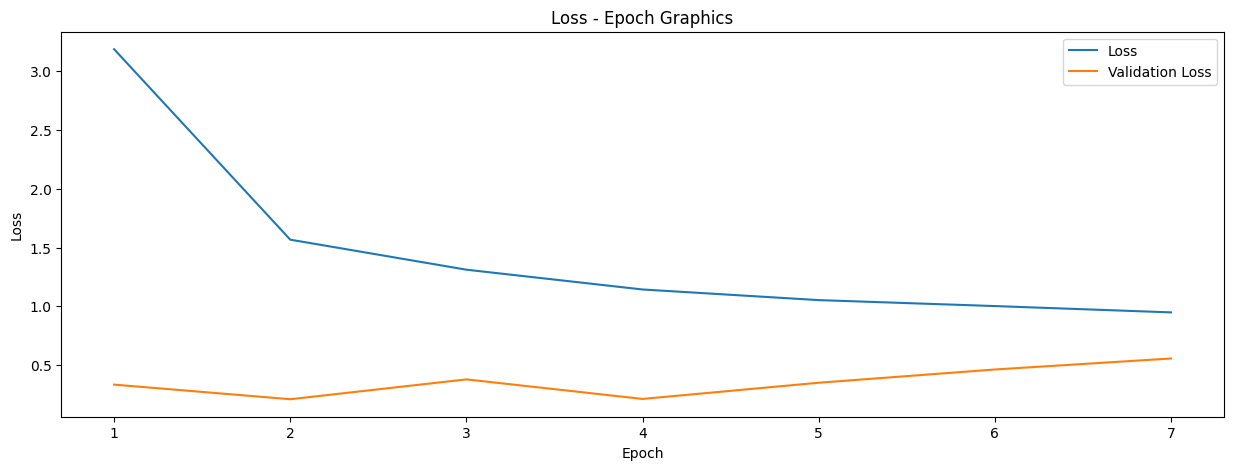

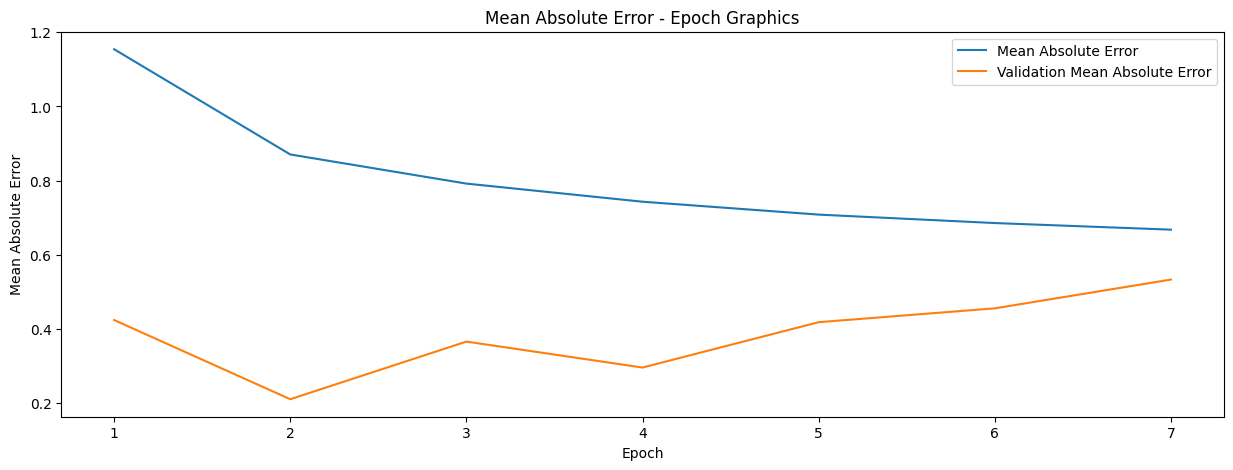

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()


figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [ ]:
eval_result = model.evaluate(DataGenerator(test_dataset_x, test_dataset_y, BATCH_SIZE))
for i in range(len(eval_result)):
 print(f'{model.metrics_names[i]} --> {eval_result[i]}')

  25/1309 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0851 - mae: 0.2211

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0718 - mae: 0.1961
loss --> 0.07727503031492233
compile_metrics --> 0.20261013507843018


kestirim işlemi nasıl yapılmalı? Daha önce kestirim işlemi eğtiim nasıl yapılmışsa o koşullarda yaptık. Biz burada 144 tane 10'ar dakikalık verileri standart ölçeklendirmeye sokarak kuyllandık. O halde kestirimi de tamamen aynı biçimde yapmalıyız. Yani bu örneğimizde kestirim yapabilmemiz için elimizde 144 tane 10 dakikalık verilerin olması gerekmektedir.

## Geri Beslemeli Ağlarda Çıktı Üretimi

Bazen gelecek kestirimi çıktı üretimleri için de kullanılabimektedir. 2015 yılından itibaren LSTM atabanlı ger ibeslemeli ağlar özellikle metinlerin üretiminde kullanılmaya başlanmıştır.

Geri beslemeli ağlarda metin oluşturma işlemi tipik olarak şöyle yapılmaktadır:

1) üretilecek metni belli bir kişinin tarzına uydurmak için o kişinin yazıları elde edilir.

2) sonra bir geri beslemeli sinir ağı oluşturlarak sinir ağı bu yazılarla eğitlir. Burada karakter temelli bir çıktı üretiminin söz konusu olduğunu düşünelim. Bunun için seçilen kişiye ilişkin yazıların belli miktardaki karakterden oluşan kısımları - örneğin 32 karakter olduğunu varsayalım - ve bu kısımdan sonragele nkarakterler eğitim amacıyla toplanır. Böylece bu işlemden 32 karakterden oluşan bir yazı parçaları ile (dataset_X), 1 karakterden oluşan sonuç değerleri (dataset_y) elde edilecektir.

3) geri beslemeli bir yapay sinir ağı modeli kurularak ağ oluşturulan veri kümesiyle eğitilir. Geri besleme için genellikle LSTM modeli tercih edilir.

4) Artık elimizde 32 karakterini girdi olarak verdiğimiz bir metnin 33'üncü karakterini tahmin edebilen bir geri beslemeli yapay sinir ağı m odeli vardır. Bu durumda biz 32 karakterlik bir yazıyı başlangıç yazısı olarak verirsek ağdan bunun 33'üncü karakterini elde edebiliriz. Bundan sonra yine bu 33 karakterli yazının son 32 karakterini alarak yeni bir karakter elde ederiz. Bu işlemi böyle sürdürüsek istediğimiz uzunlukta bir yazı elde etmiş oluruz.

5) Modelin bu biçimde oluşturulması yazının tek düze ve yaratıcılık içermeyen bir yapıda olmasına yol açabilmektedir. Bu nedenle her defasında ağdan elde edilen karakteri doğrudan kullanmak yerine işin içine bir miktar rassallık da katılarak belli bir olasılık dağılımı çerçevesinde yeni karakterin elde edilmesi daha yaratıcıcı bir metnin oluşmasına yol açmaktadır.

Örneğin belli bir bestecinin tarzına göre beste yapan bir sinir ağı modeli oluşturulabilir.

Şimdi Nietzsche'nin metinlerinden oluşan bir yazıyı kullanarak Nietzsche tarzında metin üreten bir uygulama yapamya çalışaım.

"Deep Learning With Python (François Chollet)"


